# 카이제곱 검정 (교차분석, 빈도분석)
- 관찰된 빈도수의 기댓값과 얼마나 다른지 확인
- 귀무가설: 분할표의 행과 열은 독립이다.
- 연구가설: 분할표의 행과 열은 독립이 아니다.

In [23]:
import pandas as pd

In [24]:
data = pd.read_csv("./housetask.txt", sep='\t', index_col=0)
data

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Finances,13,13,21,66


In [25]:
import scipy.stats

In [26]:
chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(data)
print("test statistic:", chi2)
print("p-value:", pvalue)
print("degree of freedom:", dof)
print("expected:", expected)

test statistic: 1944.4561959955277
p-value: 0.0
degree of freedom: 36
expected: [[60.55045872 25.63302752 38.44954128 51.36697248]
 [52.63761468 22.28325688 33.42488532 44.65424312]
 [37.1559633  15.7293578  23.5940367  31.5206422 ]
 [48.16513761 20.38990826 30.58486239 40.86009174]
 [41.97247706 17.76834862 26.65252294 35.60665138]
 [38.87614679 16.45756881 24.68635321 32.97993119]
 [41.28440367 17.47706422 26.21559633 35.02293578]
 [33.02752294 13.98165138 20.97247706 28.01834862]
 [47.82110092 20.24426606 30.36639908 40.56823394]
 [38.87614679 16.45756881 24.68635321 32.97993119]
 [47.82110092 20.24426606 30.36639908 40.56823394]
 [56.76605505 24.0309633  36.04644495 48.1565367 ]
 [55.04587156 23.30275229 34.95412844 46.69724771]]


# 결과해석
- p-value < 0.05이므로, 대립가설 채택
- 즉, 집안일의 종류와 수행하는 사람은 독립이 아님

# 피셔의 정확검정
- 서로의 빈도 수 차이가 많이 나는 경우 사용하는 검정

In [37]:
import pandas as pd
from scipy.stats import fisher_exact

In [38]:
data2 = pd.DataFrame([[1, 6], [5, 2]])
data2.columns = ['가짜 약','진짜 약']
data2.index = ['효과있음', '효과없음']
data2

,가짜 약,진짜 약
효과있음,1,6
효과없음,5,2


### p-value > 0.05 이므로 약의 유효성은 없다

In [40]:
oddsratio, pvalue = fisher_exact(data2)
print("oddratio:", oddsratio, "\n"
        "p-value:", pvalue )

oddratio: 0.06666666666666667 
p-value: 0.10256410256410275


# 자유도에 따른 chi-squre 그래프

In [29]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

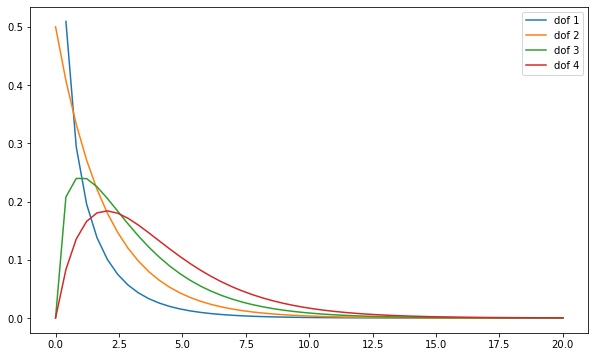

In [30]:
x = np.linspace(0, 20, 50)
plt.figure(figsize=(10, 6))

for dof in range(1, 5):
    y = chi2(dof).pdf(x)
    plt.plot(x, y, label="dof {}".format(dof))
plt.legend()
plt.show()